In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#import the data
#df = pd.read_csv('Raw Data.csv')
#df.head()
#df.info()

#Lets's generate a theoretical signal
t1 = 0 #start time
t2 = 100 #end time
dt = 0.1 #time step
time_vect = np.arange(t1,t2,dt) #time vector    
#time_vect

#Model signal
signal = np.sin(time_vect/2) 

#add noise to the signal
noise_level = 1 #Noise
background_max = 3 #Background level

#Create a noisy signal with background 

noisy_signal = signal + (-(time_vect**2) + t2*time_vect)/(t2**2/4)*background_max + noise_level*np.random.rand(len(time_vect))


In [37]:
#Let's generate a theoretical signal\n

t1 = 0 #Start time
t2 = 100 #End time
dt = 0.1
time_vect = np.arange(t1,t2,dt) #Define a time vector
#time_vect
#Model signal or wanted signal\n
signal = np.sin(time_vect/2)
#Add noise to the signal
noise_level = 1 #Noise
bckround_max = 3 #Background level
#Create a noisy signal with background
noisy_signal = signal + (-(time_vect*2) + t2*time_vect)/(t2*2/4)*bckround_max + noise_level*np.random.rand(len(time_vect))

data = pd.read_csv('Raw Data.csv')
data.head()


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.110155,-0.393448,-0.638708,0.905134,1.175593
1,0.115160,-0.361514,-0.605341,0.857207,1.109925
2,0.120195,-0.345615,-0.578843,0.801596,1.047409
3,0.125230,-0.376577,-0.560640,0.715285,0.983748
4,0.130296,-0.386075,-0.511343,0.630925,0.899218


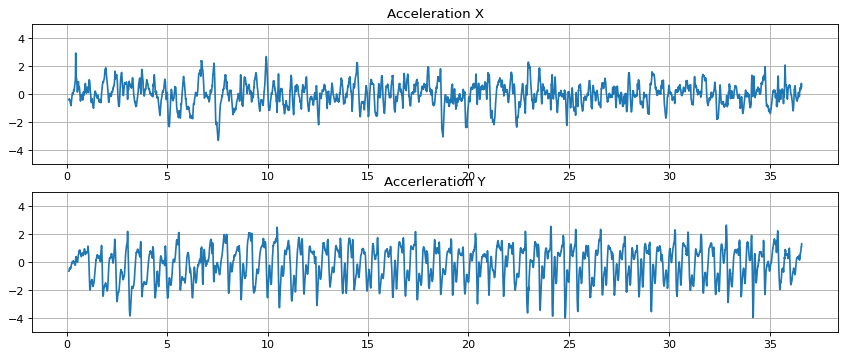

In [38]:
fig = plt.figure(num=None, figsize= (13, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(data['Time (s)'],data['Linear Acceleration x (m/s^2)'])
plt.grid()
plt.ylim(-5,5)
plt.title('Acceleration X')
plt.subplot(2,1,2)
plt.plot(data['Time (s)'],data['Linear Acceleration y (m/s^2)'])
plt.title('Accerleration Y')
plt.grid()
plt.ylim(-5,5)
plt.show()

48.0


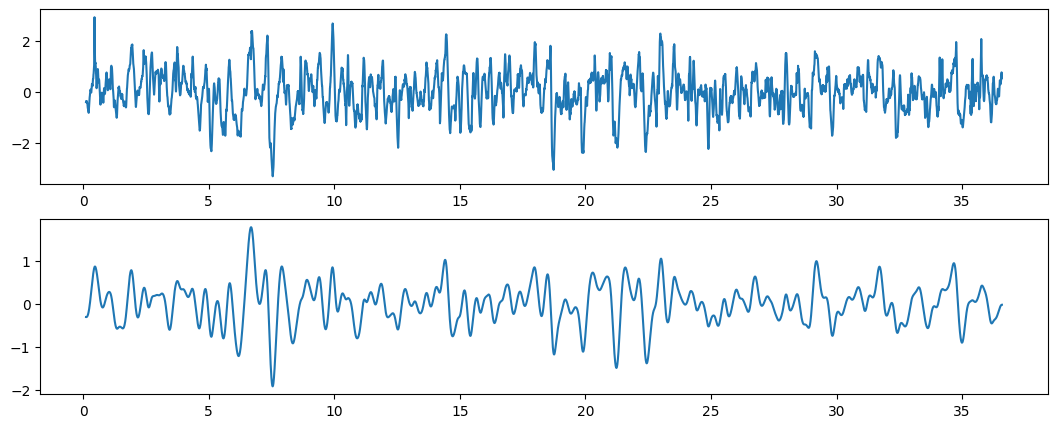

In [39]:
#filter data
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y
noisy_signal = data['Linear Acceleration x (m/s^2)']
time = data['Time (s)']
order = 2
dt = (time[len(time)-1] - time[0])/len(time) #time is different from time_vect

fs = 1/dt # sampling rate
nyq = 0.5 * fs
cutoff_H = 1/5 # desired cutoff frequency of the filter, Hz
cutoff_L = 1/0.5 # desired cutoff frequency of the filter, Hz
#after this filter we will hane only frequencies from 1/40 and 1/5

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs,nyq, order)
final_signal = butter_highpass_filter(lowpass_filtered, cutoff_H, fs,nyq, order)

plt.figure(figsize=(13, 5))
plt.subplot(2,1,1)
plt.plot(time, noisy_signal)
plt.subplot(2,1,2)
plt.plot(time, final_signal)

stepdata = final_signal
step = 0
for i in range(len(stepdata)-1):
    if stepdata[i]/stepdata[i+1] < 0 :
        step = step + 0.5
print(step)

48.0


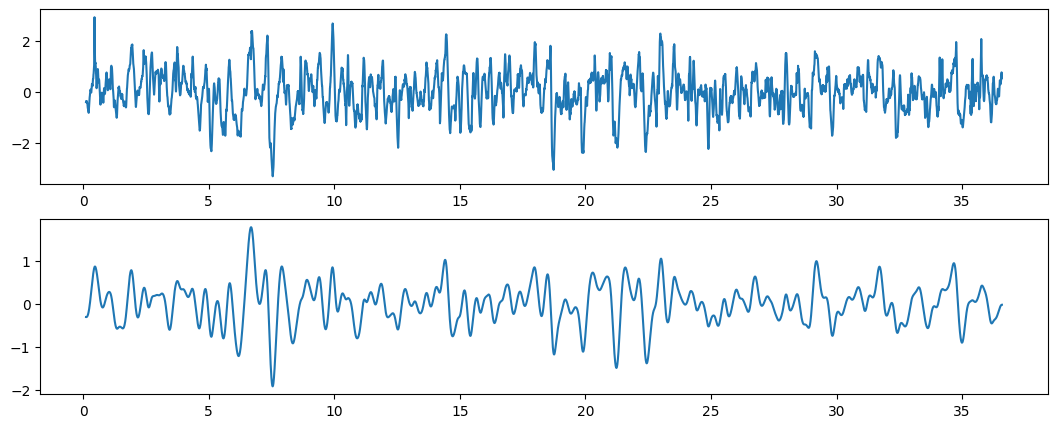

In [40]:
#filter data
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y
noisy_signal = data['Linear Acceleration x (m/s^2)']
time = data['Time (s)']
order = 2
dt = (time[len(time)-1] - time[0])/len(time) #time is different from time_vect

fs = 1/dt # sampling rate
nyq = 0.5 * fs
cutoff_H = 1/5 # desired cutoff frequency of the filter, Hz
cutoff_L = 1/0.5 # desired cutoff frequency of the filter, Hz
#after this filter we will hane only frequencies from 1/40 and 1/5

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs,nyq, order)
final_signal = butter_highpass_filter(lowpass_filtered, cutoff_H, fs,nyq, order)

plt.figure(figsize=(13, 5))
plt.subplot(2,1,1)
plt.plot(time, noisy_signal)
plt.subplot(2,1,2)
plt.plot(time, final_signal)

stepdata = final_signal
step = 0
for i in range(len(stepdata)-1):
    if stepdata[i]/stepdata[i+1] < 0 :
        step = step + 0.5
print(step)

ValueError: x and y must have same first dimension, but have shapes (1000,) and (7229,)

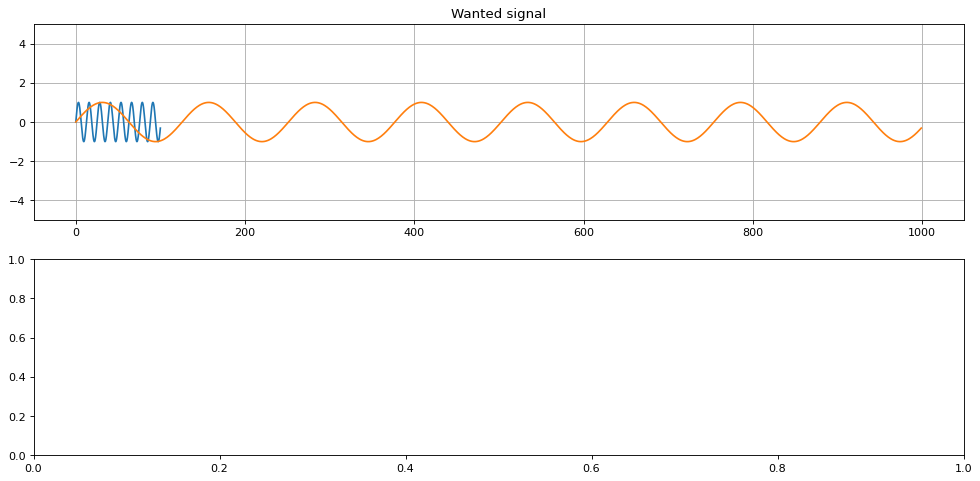

In [41]:
fig = plt.figure(num=None ,figsize=(15,7) , dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(time_vect,signal, signal)
plt.grid()
plt.ylim(-5,5)
plt.title('Wanted signal')
plt.subplot(2,1,2)
plt.plot(time_vect,noisy_signal)
plt.plot('Signal wtih noise and background')
plt.grid()
plt.ylim(-5,5)
plt.show()

In [ ]:
%pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/f3/31/91a2a3c5eb85d2bfa86d7c98f2df5d77dcdefb3d80ca9f9037ad04393acf/scipy-1.12.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 682.7 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 440.4 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 539.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/45.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.8 MB 1.9 MB/s eta 0:00:24
   ---------------------------------------- 0.2/45.8 MB 2.6 MB/s eta 0:00:18
   ---------------------------------------- 0.3/45.8 MB 2.6 MB/s eta 0:00:18
   ---------------------------------------- 0.4/45.8 MB 2.4 MB/s eta 0:00:19
   ---------------------------------------- 0.5/45.8 MB 2.5 MB/s eta 0:00:18
    ------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
